In [1]:
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pprint import pprint
import seaborn as sns

In [2]:
complete_df = pd.read_csv("full_data.csv")
complete_df.info()

complete_df = complete_df.loc[~complete_df.duplicated(subset=['County','State'])]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    2851 non-null   int64  
 1   County                                                                                        2851 non-null   object 
 2   State                                                                                         2851 non-null   object 
 3   Total Population                                                                              2851 non-null   float64
 4   Land Area (m^2)                                                                               2851 non-null   float64
 5   Population Density (per m^2

In [3]:
pop_dense = complete_df['Population Density (per m^2)']
sq_mile = complete_df['Land Area (m^2)']

avg_income = complete_df['Income per capita']
gross_rent = complete_df['Median Gross Rent']

 

Text(0.5, 1.0, 'Population Density (person per m^2)')

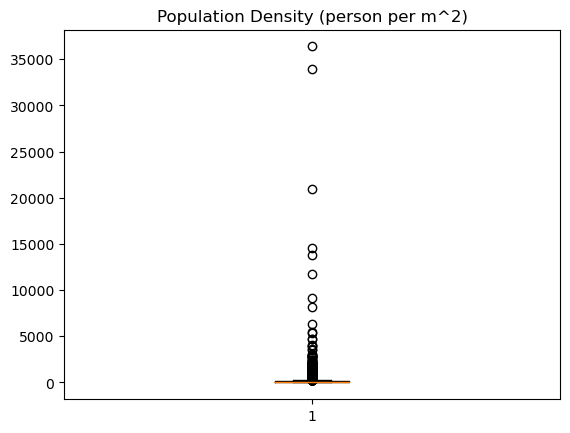

In [4]:
plt.boxplot(pop_dense)
plt.title("Population Density (person per m^2)")

(0.0, 400.0)

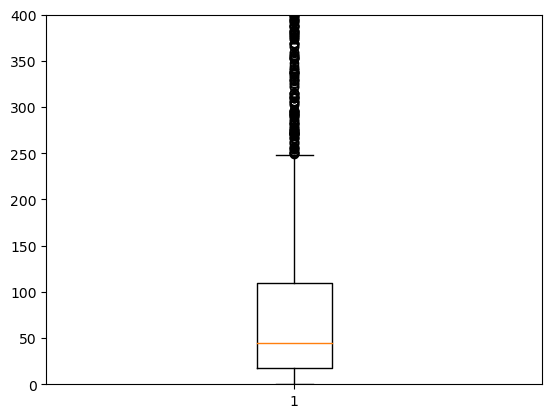

In [5]:
plt.boxplot(pop_dense)
plt.ylim(0,400)

In [6]:
len(complete_df.loc[complete_df['Population Density (per m^2)']>250])/len(complete_df['Population Density (per m^2)'])

0.1372618207480593

Determine cutoff for outliers based on IQR?

In [7]:
complete_df['Population Density (per m^2)'].describe()

count     2834.000000
mean       211.278574
std       1195.144933
min          0.203252
25%         17.223321
50%         44.545271
75%        109.970286
max      36384.792432
Name: Population Density (per m^2), dtype: float64

In [8]:
quartiles = complete_df['Population Density (per m^2)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")
print(f'Values below {lower_bound} may be outliers')
print(f'Values above {upper_bound} may be outliers')

The lower quartile is 17.22332115416988
The upper quartile is 109.97028601127809
Values below -121.89712613149244 may be outliers
Values above 249.0907332969404 may be outliers


Parsing data into low pop density and high pop density groups

In [9]:
low_den_df = complete_df.loc[complete_df['Population Density (per m^2)']<upper_bound]
low_den_df.head()

,Unnamed: 0,County,State,Total Population,Land Area (m^2),Population Density (per m^2),Median Gross Rent,Income per capita,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21",...,"Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
0,0,Autauga,Alabama,55639.0,594.44,93.599018,1011.0,29804.0,4126.0,12977.0,...,32.758621,28.694401,28.131469,6242.0,11.2,24985.0,1420.0,5.4,67565.0,125.217762
1,1,Baldwin,Alabama,218289.0,1589.78,137.307678,1032.0,33751.0,14555.0,44342.0,...,27.375492,31.188379,32.450286,20189.0,8.9,92751.0,6159.0,6.2,71135.0,131.834019
2,2,Barbour,Alabama,25026.0,884.88,28.281801,587.0,20074.0,4378.0,6600.0,...,36.676855,27.841067,11.153098,5548.0,25.5,8004.0,676.0,7.8,38866.0,72.030097
3,3,Bibb,Alabama,22374.0,622.58,35.937550,693.0,22626.0,3125.0,7052.0,...,43.918540,24.705736,11.913807,3549.0,17.8,8073.0,639.0,7.3,50907.0,94.345602
4,4,Blount,Alabama,57755.0,644.78,89.573188,666.0,25457.0,6650.0,14284.0,...,35.123439,33.621029,14.903610,7525.0,13.1,23973.0,1143.0,4.6,55203.0,102.307350


In [10]:
high_den_df = complete_df.loc[complete_df['Population Density (per m^2)']>upper_bound]
high_den_df.head()

,Unnamed: 0,County,State,Total Population,Land Area (m^2),Population Density (per m^2),Median Gross Rent,Income per capita,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21",...,"Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
13,13,McCracken,Kentucky,65485.0,248.74,263.266865,744.0,30044.0,3582.0,15235.0,...,32.206579,33.517250,26.703873,9974.0,15.5,4485.0,337.0,7.0,31453.0,58.166587
26,26,Oldham,Kentucky,66508.0,187.22,355.239825,964.0,44186.0,2728.0,8888.0,...,19.787168,29.734182,44.405361,3143.0,5.0,4770.0,315.0,6.2,45177.0,83.546621
55,55,Anoka,Minnesota,353775.0,423.01,836.327746,1162.0,37804.0,14435.0,67611.0,...,27.433406,35.428780,31.280761,25261.0,7.1,17812.0,1225.0,6.4,60159.0,79.692406
61,61,Carver,Minnesota,103561.0,354.33,292.272740,1170.0,48492.0,2634.0,12397.0,...,17.912928,28.592483,49.688615,3731.0,3.5,13194.0,1357.0,9.3,52271.0,69.243201
66,66,Montgomery,Tennessee,204992.0,539.18,380.192144,972.0,28032.0,8634.0,36120.0,...,26.886203,36.821146,29.865867,22576.0,10.8,3421.0,192.0,5.3,64271.0,112.831361


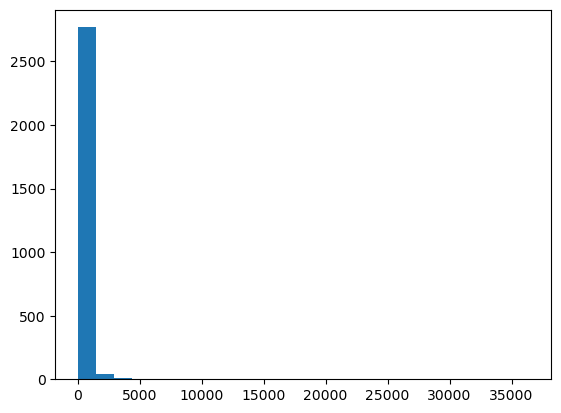

In [11]:
pop_histo = plt.hist(pop_dense, bins = 25)

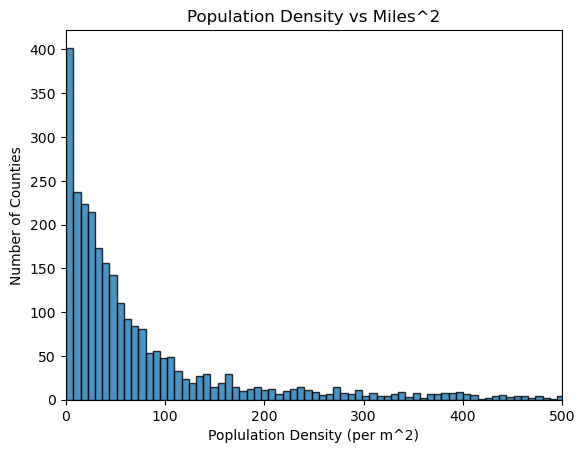

In [12]:
pop_histo = plt.hist(pop_dense, bins = 5000, alpha = .8, edgecolor = 'black')
plt.xlim(0,500)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Number of Counties")
plt.title("Population Density vs Miles^2")

plt.savefig('outputs/densityhisto.png')

rvalue: -0.06756208340829312
p-value: 0.0003191783254952949


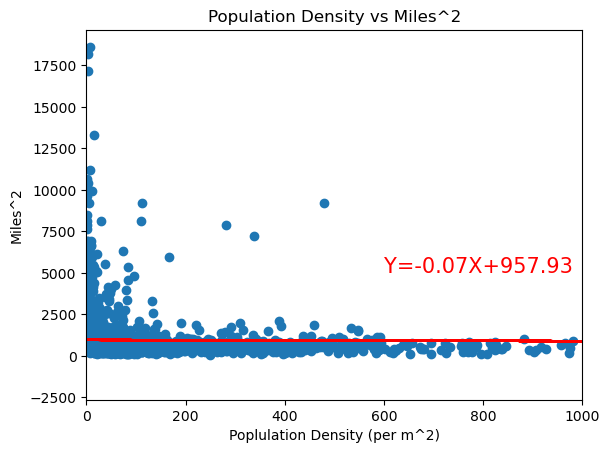

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,sq_mile)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlim(0,1000)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Miles^2")
plt.title("Population Density vs Miles^2")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")
plt.savefig('outputs/linreg_pop_vs_miles.png')

rvalue: 0.18321063739905155
p-value: 8.172353349826106e-23


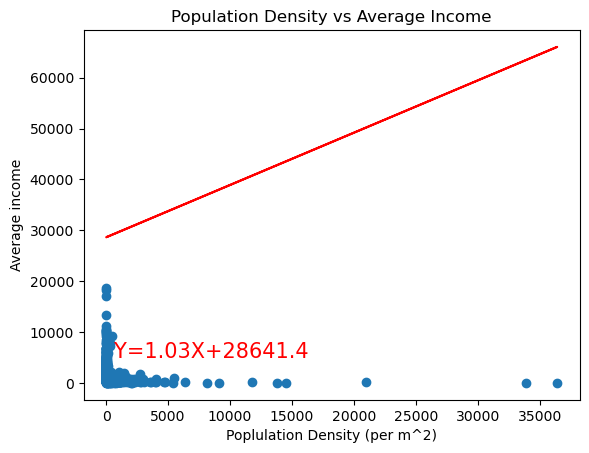

In [14]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,avg_income)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)

plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Average income")
plt.title("Population Density vs Average Income")

print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")

rvalue: 0.31183965553911813
p-value: 5.864022477489176e-65


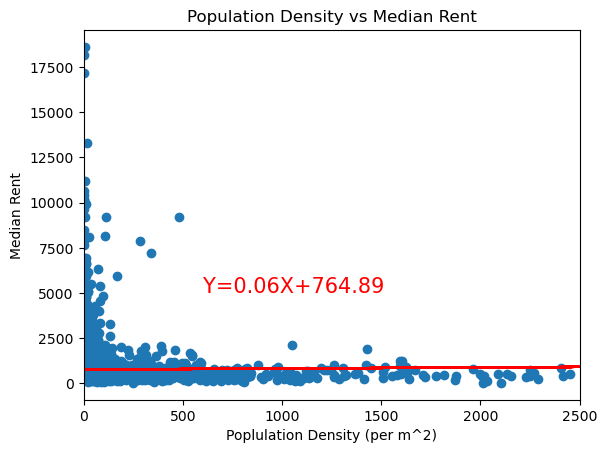

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,gross_rent)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlim(0,2500)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Median Rent")
plt.title("Population Density vs Median Rent")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")


Text(0.5, 1.0, 'Average income vs Median Rent')

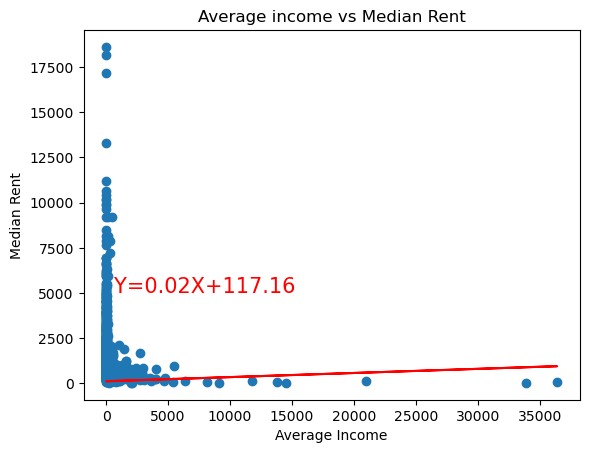

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_income,gross_rent)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlabel("Average Income")
plt.ylabel("Median Rent")
plt.title("Average income vs Median Rent")

# Population Density Analyses

In [17]:
low_den_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2850
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    2443 non-null   int64  
 1   County                                                                                        2443 non-null   object 
 2   State                                                                                         2443 non-null   object 
 3   Total Population                                                                              2443 non-null   float64
 4   Land Area (m^2)                                                                               2443 non-null   float64
 5   Population Density (per m^2

In [18]:
high_den_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 13 to 2845
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    391 non-null    int64  
 1   County                                                                                        391 non-null    object 
 2   State                                                                                         391 non-null    object 
 3   Total Population                                                                              391 non-null    float64
 4   Land Area (m^2)                                                                               391 non-null    float64
 5   Population Density (per m^2

## Low & High - 'Histogram of Population Density (O/Ma)

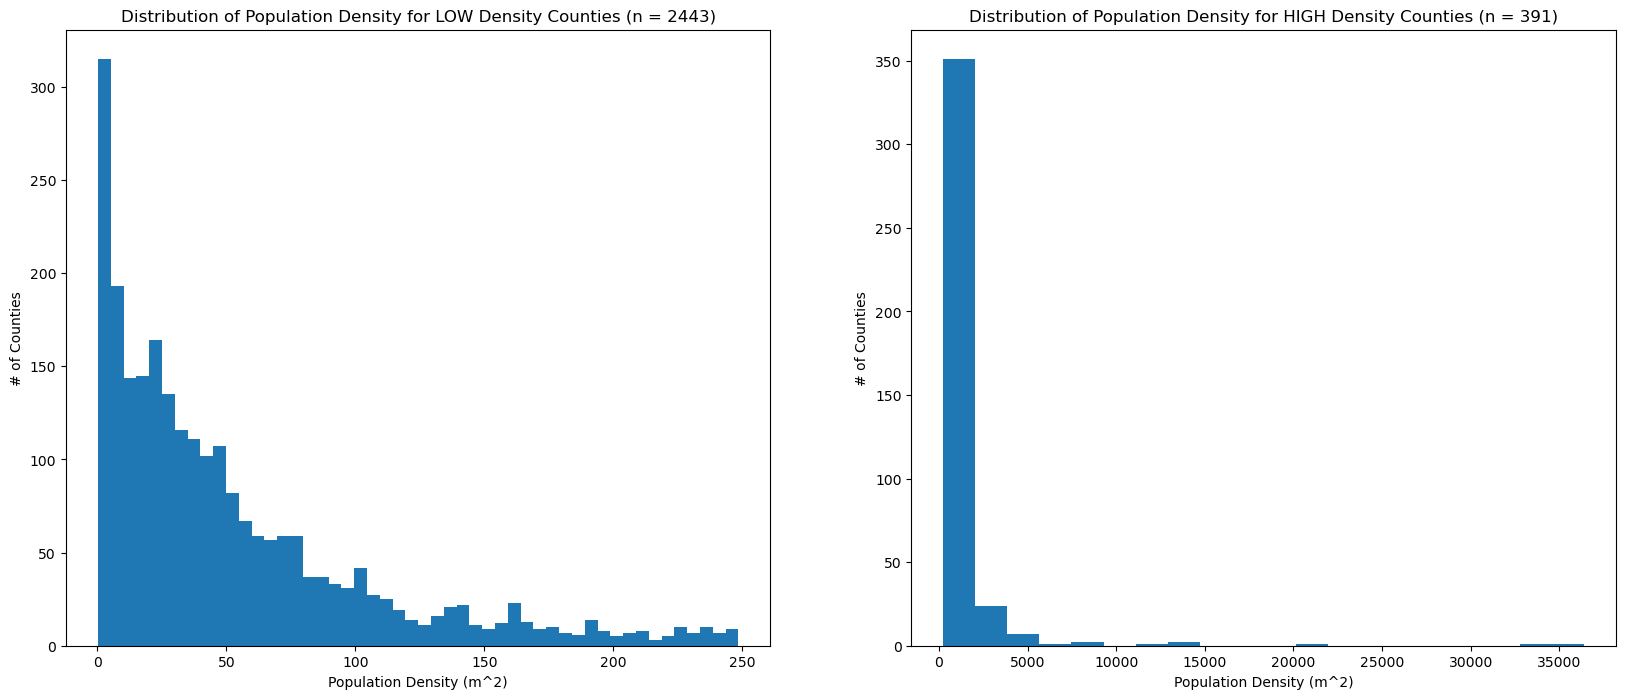

In [35]:
# plotting code
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

ax0.hist(low_den_df['Population Density (per m^2)'], bins=50)
ax0.set_ylabel("# of Counties")
ax0.set_xlabel('Population Density (m^2)')
ax0.set_title(f"Distribution of Population Density for LOW Density Counties (n = {len(low_den_df)})")

ax1.hist(high_den_df['Population Density (per m^2)'], bins=20)
ax1.set_ylabel("# of Counties")
ax1.set_xlabel('Population Density (m^2)')
ax1.set_title(f"Distribution of Population Density for HIGH Density Counties (n = {len(high_den_df)})")

plt.savefig('outputs/high_low_histo_pop_density')

## Low - Population Density vs. Land Area $m^2$ (Morgen)

Text(0.5, 1.0, 'Population Density (per m^2)')

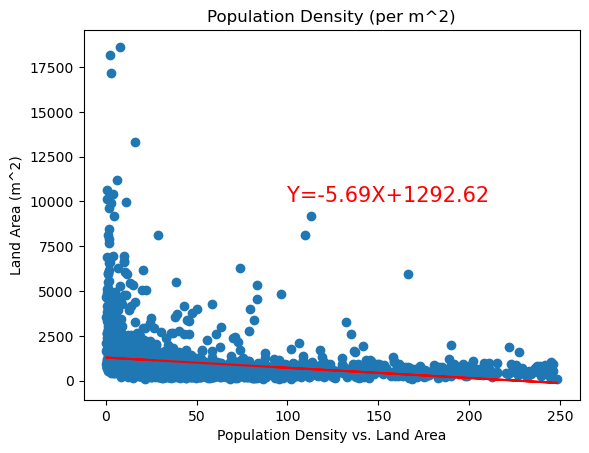

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(low_den_df["Population Density (per m^2)"],
                                                        low_den_df["Land Area (m^2)"])
regress_eq = slope * low_den_df["Population Density (per m^2)"] + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))

plt.scatter(low_den_df["Population Density (per m^2)"], low_den_df["Land Area (m^2)"])
plt.plot(low_den_df["Population Density (per m^2)"], regress_eq, "r-")
plt.annotate(line_eq,(100,10000), fontsize = 15, color = 'red')
plt.xlabel("Population Density vs. Land Area")
plt.ylabel("Land Area (m^2)")
plt.title("Population Density (per m^2)")

## High - Population Density vs. Land Area $m^2$ (Morgen)

Text(0.5, 1.0, 'Population Density (per m^2)')

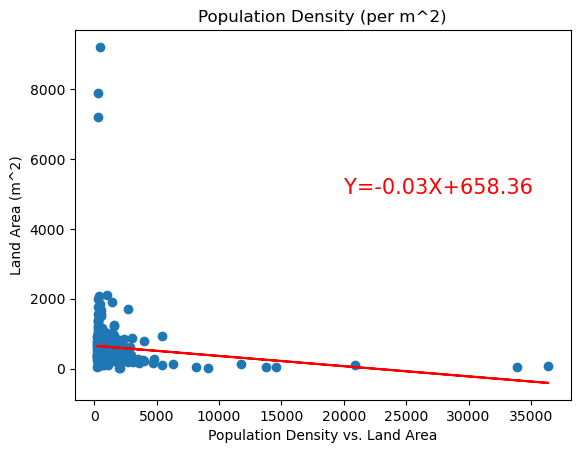

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(high_den_df["Population Density (per m^2)"],
                                                        high_den_df["Land Area (m^2)"])
regress_eq = slope * high_den_df["Population Density (per m^2)"] + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))

plt.scatter(high_den_df["Population Density (per m^2)"], high_den_df["Land Area (m^2)"])
plt.plot(high_den_df["Population Density (per m^2)"], regress_eq, "r-")
plt.annotate(line_eq,(20000,5000), fontsize = 15, color = 'red')
plt.xlabel("Population Density vs. Land Area")
plt.ylabel("Land Area (m^2)")
plt.title("Population Density (per m^2)")

## Low - Population Density vs. Median Gross Rent (Ryan)

In [21]:
#Get column data from the dataframe
low_pop_den = low_den_df["Population Density (per m^2)"]
low_pop_median_rent = low_den_df["Median Gross Rent"]
high_pop_den = high_den_df["Population Density (per m^2)"]
high_pop_median_rent = high_den_df["Median Gross Rent"]

rvalue: 0.4047840018765402
p-value: 5.59485519227038e-97
rvalue: 0.2432444865947585
p-value: 1.1287495570246988e-06


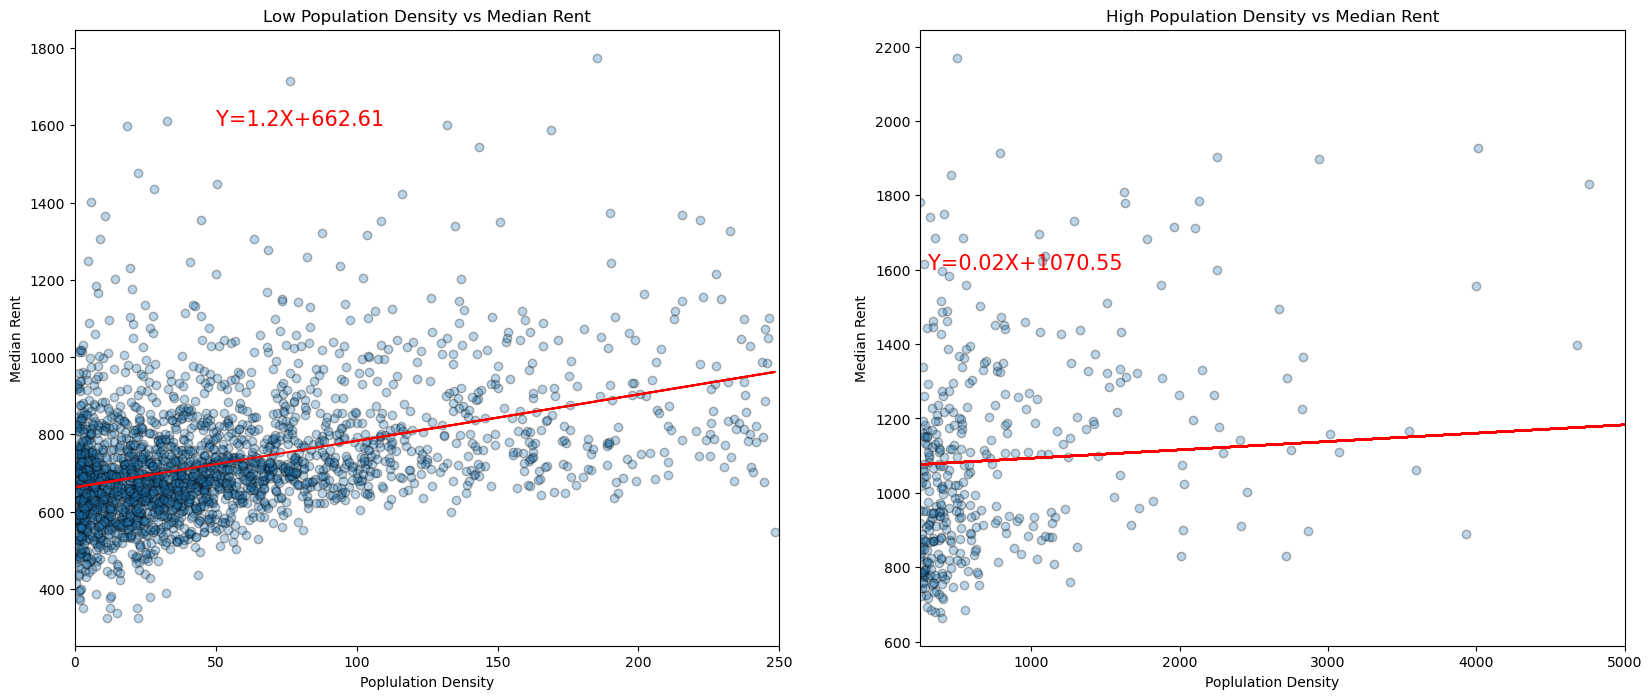

In [22]:
#Create two side by side figures
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

#Check for corrilation and create regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(low_pop_den, low_pop_median_rent)
regress_value = low_pop_den * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))

#Create the first visualization (low dense counties vs median rent)
ax0.plot(low_pop_den, regress_value, "r-")
ax0.annotate(line_eq,(50, 1600), fontsize = 15, color = 'red')
ax0.scatter(low_pop_den, low_pop_median_rent, edgecolors = 'black', alpha = .3)
ax0.set_xlim(0, 250)
ax0.set_xlabel("Poplulation Density")
ax0.set_ylabel("Median Rent")
ax0.set_title("Low Population Density vs Median Rent")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")

#Check for corrilation and create regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(high_pop_den, high_pop_median_rent)
regress_value = high_pop_den * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))

#Create the second visualization (high dense counties vs median rent)
ax1.plot(high_pop_den, regress_value, "r-")
ax1.annotate(line_eq,(300, 1600), fontsize = 15, color = 'red')
ax1.scatter(high_pop_den, high_pop_median_rent, edgecolors = 'black', alpha = .3)
ax1.set_xlim(250, 5000)
ax1.set_xlabel("Poplulation Density")
ax1.set_ylabel("Median Rent")
ax1.set_title("High Population Density vs Median Rent")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")

### Low - Population Density vs. Education things (Gina)

### High - Population Density vs. Education things (Gina)

In [23]:
#Calculate the weighted value of education per county. ("Less than highschool = 1" "Highschool Degree = 2")
low_weighted_education = (low_den_df['Less Than A High School Diploma, 2017-21'] + low_den_df['High School Diploma Only, 2017-21'] * 2 +
    low_den_df["Some College Or Associate'S Degree, 2017-21"] * 3 + low_den_df["Bachelor'S Degree Or Higher, 2017-21"] * 4) / low_den_df['Total Population']
low_median_income = low_den_df['Median_Household_Income_2020']
labels = ["1.00-1.25", "1.25-1.50", "1.50-1.75", "1.75-2.00", "2.00-2.25", "2.25-2.50", "2.50-2.75", "2.75-3.00"]
bins = pd.cut(low_weighted_education, bins = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
low_median_income_by_bin = low_median_income.groupby(bins).mean()

In [24]:
### Low - Education vs. Median Household Income (Ryan)

### High - Education vs. Median Household Income (Ryan)

In [25]:
high_weighted_education = (high_den_df['Less Than A High School Diploma, 2017-21'] + high_den_df['High School Diploma Only, 2017-21'] * 2 +
    high_den_df["Some College Or Associate'S Degree, 2017-21"] * 3 + high_den_df["Bachelor'S Degree Or Higher, 2017-21"] * 4) / high_den_df['Total Population']
high_median_income = high_den_df['Median_Household_Income_2020']
labels = ["1.00-1.25", "1.25-1.50", "1.50-1.75", "1.75-2.00", "2.00-2.25", "2.25-2.50", "2.50-2.75", "2.75-3.00"]
bins = pd.cut(high_weighted_education, bins = [1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
high_median_income_by_bin = high_median_income.groupby(bins).mean()

rvalue: 0.3274265292860242
p-value: 3.189235032973986e-11


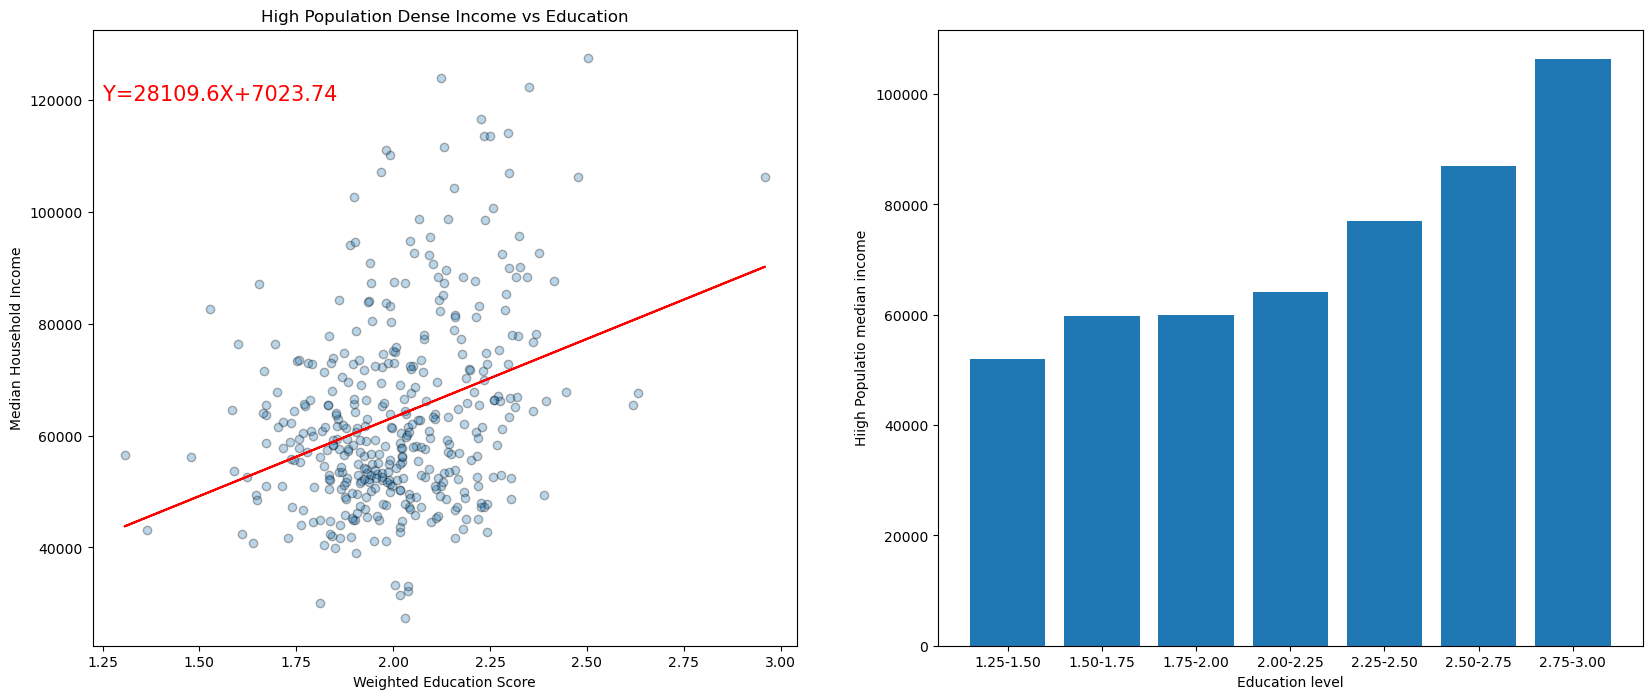

In [26]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

(slope, intercept, rvalue, pvalue, stderr) = linregress(high_weighted_education,high_median_income)
regress_value = high_weighted_education * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
ax0.plot(high_weighted_education, regress_value, "r-")
ax0.annotate(line_eq,(1.25, 120000), fontsize = 15, color = 'red')
ax0.scatter(high_weighted_education, high_median_income, edgecolors = 'black', alpha = .3)
ax0.set_xlim()
ax0.set_ylim()
ax0.set_xlabel("Weighted Education Score")
ax0.set_ylabel("Median Household Income")
ax0.set_title("High Population Dense Income vs Education")

ax1.bar(labels[:len(high_median_income_by_bin)], high_median_income_by_bin)
ax1.set_xlabel('Education level')
ax1.set_ylabel('Hiigh Populatio median income')
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")

## Population Density vs. Income Stuff

### Low & High - Population Density vs. Median_household_income (O)

In [27]:
# Set variables
low_pop_dens = low_den_df['Population Density (per m^2)']
high_pop_dens = high_den_df['Population Density (per m^2)']
low_median_house_income = low_den_df['Median_Household_Income_2020']
high_median_house_income = high_den_df['Median_Household_Income_2020']

(m1,b1,rvalue1,pvalue1,stderr1) = linregress(low_den_df['Population Density (per m^2)'], low_den_df['Median_Household_Income_2020'])
y_pred_low = m1*low_den_df['Population Density (per m^2)'] + b1


low_den_lineq = f"y = {round(m1,2)}x + {round(b1,2)}"

Text(0.5, 1.0, 'Median Household Income vs Population Density for High Density Counties')

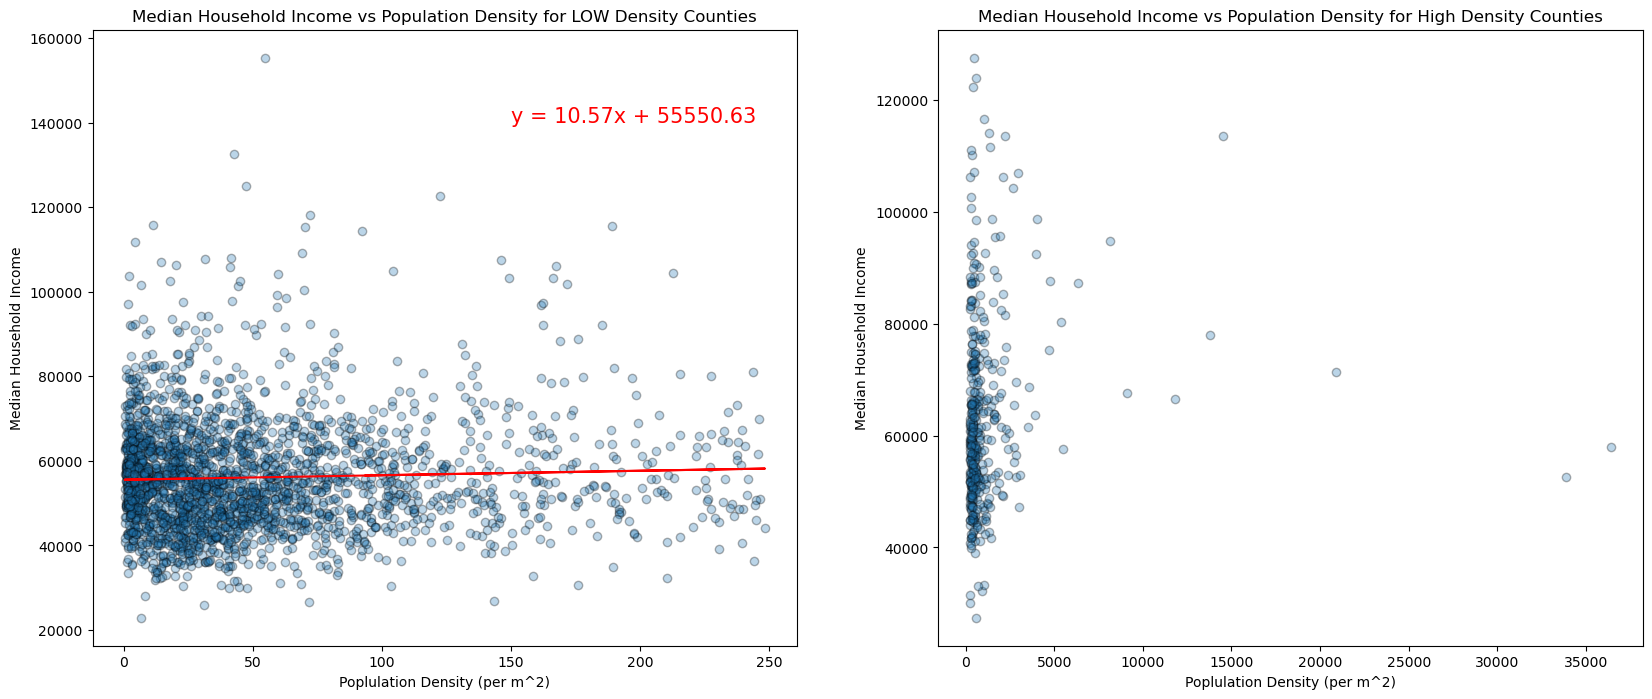

In [28]:
fig_pop_medhouse, (ax0, ax1)  = plt.subplots(ncols=2, nrows=1, figsize=(20,8))


ax0.scatter(low_pop_dens , low_median_house_income , edgecolors = 'black', alpha = .3)
ax0.plot(low_pop_dens,y_pred_low, color = 'r')
ax0.set_xlabel("Poplulation Density (per m^2)")
ax0.set_ylabel("Median Household Income")
ax0.set_title("Median Household Income vs Population Density for LOW Density Counties")
ax0.annotate(low_den_lineq,(150, 140000), fontsize=15, color = 'r')

ax1.scatter(high_pop_dens , high_median_house_income, edgecolors = 'black', alpha = .3)
ax1.set_xlabel("Poplulation Density (per m^2)")
ax1.set_ylabel("Median Household Income")
ax1.set_title("Median Household Income vs Population Density for High Density Counties")

#(m1,b1,rvalue1,pvalue1,stderr1) = linregress(low_den_df['Population Density (per m^2)'], low_den_df['Median_Household_Income_2020'])
#(m1,b1,rvalue1,pvalue1,stderr1) = linregress(high_den_df['Population Density (per m^2)'], high_den_df['Median_Household_Income_2020'])

#plt.savefig('outputs/combo_high_low_scatter_density_vs_house_income.png')

### Low & High - Population Density vs. Income per capita (Mark)

In [29]:
# calculating correlations 
low_den_corr = st.pearsonr(low_den_df['Population Density (per m^2)'], low_den_df['Income per capita'])
high_den_corr = st.pearsonr(high_den_df['Population Density (per m^2)'], high_den_df['Income per capita'])

print(f"For low density counties, Population density's relationship with income per capita is statistically significant: p={low_den_corr[1]}, but the relationship is very weak: r={low_den_corr[0]}")
print(f"For high density counties, Population density's relationship with income per capita is not statistically significant: p={high_den_corr[1]}")

For low density counties, Population density's relationship with income per capita is statistically significant: p=4.730232779702755e-19, but the relationship is very weak: r=0.1790684540809703
For high density counties, Population density's relationship with income per capita is not statistically significant: p=0.14032846069551844


Text(0.5, 1.0, 'Income per capita vs. Population Density for HIGH Density Counties')

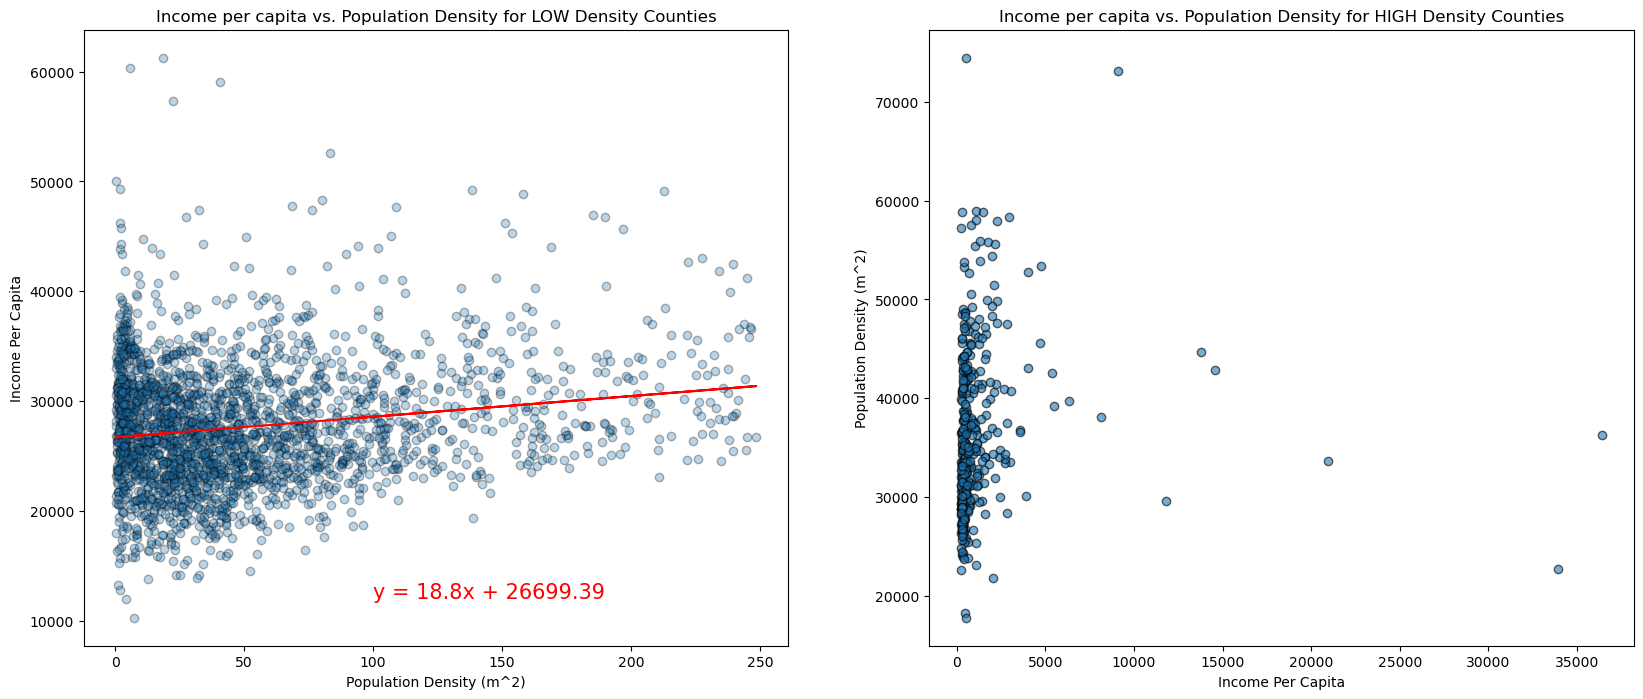

In [30]:
# code to calculate linear regressions
(m1,b1,rvalue1,pvalue1,stderr1) = linregress(low_den_df['Population Density (per m^2)'], low_den_df['Income per capita'])
(m2,b2,rvalue2,pvalue2,stderr2) = linregress(high_den_df['Population Density (per m^2)'], high_den_df['Income per capita'])

y_pred_low = m1*low_den_df['Population Density (per m^2)'] + b1
#y_pred_high = m2*high_den_df['Population Density (per m^2)'] + b2 (not plotting the regression because the relationship is insignificant)

low_den_lineq = f"y = {round(m1,2)}x + {round(b1,2)}"
#high_den_lineq = f"y = {round(m2,2)}x + {round(b2,2)}" (not plotting the regression because the relationship is insignificant)


# plotting code
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(20,8))

ax0.scatter(low_den_df['Population Density (per m^2)'], low_den_df['Income per capita'],
            edgecolors = 'black', alpha = .3)
ax0.plot(low_den_df['Population Density (per m^2)'], y_pred_low, color='r')
ax0.set_ylabel("Income Per Capita")
ax0.set_xlabel('Population Density (m^2)')
ax0.set_title("Income per capita vs. Population Density for LOW Density Counties")
ax0.annotate(low_den_lineq, (100, 12000), fontsize=15, color='r')

ax1.scatter(high_den_df['Population Density (per m^2)'], high_den_df['Income per capita'],
            edgecolors = 'black', alpha = .6)
#ax1.plot(high_den_df['Population Density (per m^2)'], y_pred_high, color='r') (not plotting the regression because it is insignificant)
ax1.set_xlabel("Income Per Capita")
ax1.set_ylabel('Population Density (m^2)')
ax1.set_title("Income per capita vs. Population Density for HIGH Density Counties")
#ax1.annotate(high_den_lineq, (100, 12000), fontsize=15, color='r') (not plotting the regression because it is insignificant)

In [31]:
low_den_df.loc[248]

Unnamed: 0                                                                                            248
County                                                                                               Lake
State                                                                                           Minnesota
Total Population                                                                                   3747.0
Land Area (m^2)                                                                                   2109.29
Population Density (per m^2)                                                                     1.776427
Median Gross Rent                                                                                   675.0
Income per capita                                                                                 27833.0
Less Than A High School Diploma, 2017-21                                                            536.0
High School Diploma Only, 2017-21             

### High & Low Heat maps

In [32]:
# variables
high_corr_test = high_den_df.corr()
low_corr_test = low_den_df.corr()


{('Income per capita',
  "Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21"),
 ('Income per capita',
  "Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",
  'Estimated Percent Of People Of All Ages In Poverty 2020'),
 ('Income per capita',
  'Percent Of Adults With A High School Diploma Only, 2017-21',
  "Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",
  'Estimated Percent Of People Of All Ages In Poverty 2020',
  'Median_Household_Income_2020'),
 ('Less Than A High School Diploma, 2017-21',
  'High School Diploma Only, 2017-21',
  "Some College Or Associate'S Degree, 2017-21",
  "Bachelor'S Degree Or Higher, 2017-21",
  'Estimate Of People Of All Ages In Poverty 2020'),
 ('Median Gross Rent',
  'County Household Median Income As A Percent Of The State Total Median '
  'Household Income, 2020'),
 ('Median Gross Rent',
  'Income per capita',
  "Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21"),
 ('Median Gross Rent',
  'Income per 

[Text(0, 0.5, 'Unnamed: 0'),
 Text(0, 1.5, 'Total Populatio'),
 Text(0, 2.5, 'Land Area (m^2)'),
 Text(0, 3.5, 'Population Dens'),
 Text(0, 4.5, 'Median Gross Re'),
 Text(0, 5.5, 'Income per capi'),
 Text(0, 6.5, 'Less Than A Hig'),
 Text(0, 7.5, 'High School Dip'),
 Text(0, 8.5, 'Some College Or'),
 Text(0, 9.5, "Bachelor'S Degr"),
 Text(0, 10.5, 'Percent Of Adul'),
 Text(0, 11.5, 'Percent Of Adul'),
 Text(0, 12.5, 'Percent Of Adul'),
 Text(0, 13.5, 'Percent Of Adul'),
 Text(0, 14.5, 'Estimate Of Peo'),
 Text(0, 15.5, 'Estimated Perce'),
 Text(0, 16.5, 'Employed_2020'),
 Text(0, 17.5, 'Unemployed_2020'),
 Text(0, 18.5, 'Unemployment_Ra'),
 Text(0, 19.5, 'Median_Househol'),
 Text(0, 20.5, 'County Househol')]

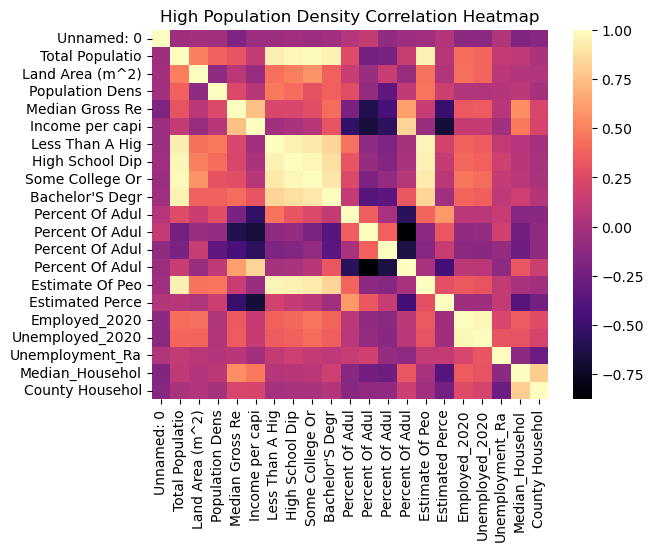

In [33]:
high_corr_pairs = (high_corr_test.abs() > 0.5) & (high_corr_test.abs() < 1.0)
high_corr_vars = set()
for col in high_corr_pairs:
    pairs = high_corr_pairs.loc[col][high_corr_pairs.loc[col]].index.tolist()
    if len(pairs) > 1:
        high_corr_vars.add(tuple(pairs))

pprint(high_corr_vars)

heat = sns.heatmap(high_corr_test, cmap = 'magma', fmt='.2f', annot_kws={"fontsize":12})
plt.title('High Population Density Correlation Heatmap')
xticklabels = [label.get_text()[:15] for label in heat.get_xticklabels()]
yticklabels = [label.get_text()[:15] for label in heat.get_yticklabels()]
heat.set_xticklabels(xticklabels)
heat.set_yticklabels(yticklabels)

{('Less Than A High School Diploma, 2017-21',
  'High School Diploma Only, 2017-21',
  "Some College Or Associate'S Degree, 2017-21",
  "Bachelor'S Degree Or Higher, 2017-21",
  'Estimate Of People Of All Ages In Poverty 2020'),
 ('Total Population',
  'High School Diploma Only, 2017-21',
  "Some College Or Associate'S Degree, 2017-21",
  'Estimate Of People Of All Ages In Poverty 2020'),
 ('Total Population',
  'Less Than A High School Diploma, 2017-21',
  'High School Diploma Only, 2017-21',
  "Bachelor'S Degree Or Higher, 2017-21",
  'Estimate Of People Of All Ages In Poverty 2020'),
 ('Total Population',
  'Less Than A High School Diploma, 2017-21',
  'High School Diploma Only, 2017-21',
  "Some College Or Associate'S Degree, 2017-21",
  "Bachelor'S Degree Or Higher, 2017-21"),
 ('Total Population',
  'Less Than A High School Diploma, 2017-21',
  "Some College Or Associate'S Degree, 2017-21",
  "Bachelor'S Degree Or Higher, 2017-21",
  'Estimate Of People Of All Ages In Poverty 202

[Text(0, 0.5, 'Unnamed: 0'),
 Text(0, 1.5, 'Total Populatio'),
 Text(0, 2.5, 'Land Area (m^2)'),
 Text(0, 3.5, 'Population Dens'),
 Text(0, 4.5, 'Median Gross Re'),
 Text(0, 5.5, 'Income per capi'),
 Text(0, 6.5, 'Less Than A Hig'),
 Text(0, 7.5, 'High School Dip'),
 Text(0, 8.5, 'Some College Or'),
 Text(0, 9.5, "Bachelor'S Degr"),
 Text(0, 10.5, 'Percent Of Adul'),
 Text(0, 11.5, 'Percent Of Adul'),
 Text(0, 12.5, 'Percent Of Adul'),
 Text(0, 13.5, 'Percent Of Adul'),
 Text(0, 14.5, 'Estimate Of Peo'),
 Text(0, 15.5, 'Estimated Perce'),
 Text(0, 16.5, 'Employed_2020'),
 Text(0, 17.5, 'Unemployed_2020'),
 Text(0, 18.5, 'Unemployment_Ra'),
 Text(0, 19.5, 'Median_Househol'),
 Text(0, 20.5, 'County Househol')]

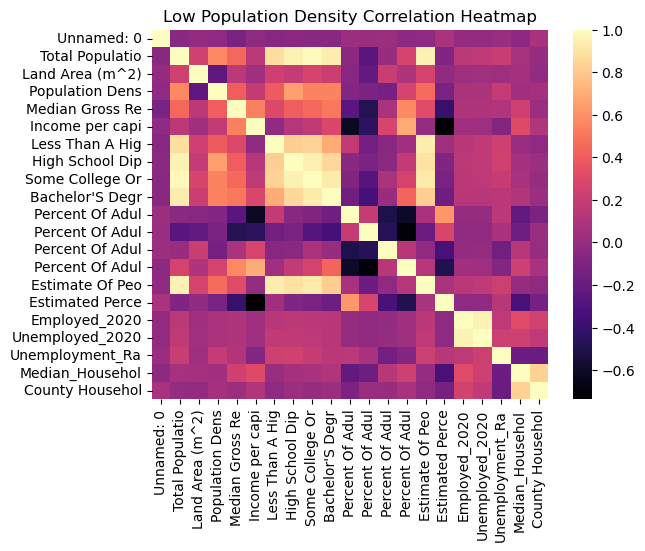

In [34]:
low_corr_pairs = (low_corr_test.abs() > 0.7) & (low_corr_test.abs() < 1.0)
low_corr_vars = set()
for col in low_corr_pairs:
    pairs = low_corr_pairs.loc[col][low_corr_pairs.loc[col]].index.tolist()
    if len(pairs) > 1:
        low_corr_vars.add(tuple(pairs))

pprint(low_corr_vars)
heat = sns.heatmap(low_corr_test, cmap = 'magma', fmt='.2f', annot_kws={"fontsize":12})
plt.title('Low Population Density Correlation Heatmap')
xticklabels = [label.get_text()[:15] for label in heat.get_xticklabels()]
yticklabels = [label.get_text()[:15] for label in heat.get_yticklabels()]
heat.set_xticklabels(xticklabels)
heat.set_yticklabels(yticklabels)